In [2]:
import os
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
stat_files=os.listdir("./stats")

In [4]:
data={}
fields=stat_files[0].split("-")
for feild in fields:
    if feild.startswith("stats"):
        data["l1Size"]=[]
    else:
        data[feild.split("_")[0]]=[]
# for file in stat_files:
stats=["simSeconds","hostInstRate","numCycles","cpu.cpi","cpu.ipc","dcache.overallMissRate::total","dcache.overallAvgMissLatency::total","icache.overallMissRate::total", "icache.overallAvgMissLatency::total","l2cache.overallMissRate::total","l2cache.overallAvgMissLatency::total"]
for stat in stats:
    data[stat]=[]

In [5]:
for f in stat_files:
    fields=f.split("-")
    for feild in fields:
        if feild.startswith("stats"):
            data["l1Size"].append(feild.split("_")[2])
        else:
            if feild.split("_")[1].endswith(".txt"):
                data[feild.split("_")[0]].append(int(re.search("\d*",feild.split("_")[1])[0]))
            else:
                data[feild.split("_")[0]].append(int(feild.split("_")[1]))
    with open("./stats/"+f) as file:
        for line in file:
            for stat in stats:
                if line.__contains__(stat):
                    data[stat].append(float(re.search("\d+\.*\d*",line.split(stat)[1])[0]))

In [6]:
data=pd.DataFrame.from_dict(data)
data

,l1Size,l1nl2ratio,l1assoc,l2assoc,l1Latency,l2Latency,blkSize,simSeconds,hostInstRate,numCycles,cpu.cpi,cpu.ipc,dcache.overallMissRate::total,dcache.overallAvgMissLatency::total,icache.overallMissRate::total,icache.overallAvgMissLatency::total,l2cache.overallMissRate::total,l2cache.overallAvgMissLatency::total
0,128kB,2,2,16,3,20,0,0.004118,898492.0,2470079.0,5.543079,0.180405,0.002395,145934.484091,0.000949,141973.791379,0.979432,134041.803000
1,128kB,2,2,16,3,20,4,0.013807,993621.0,8282363.0,5.428801,0.184203,0.000754,146237.575000,0.000271,142198.245283,0.980469,134195.160359
2,128kB,2,2,16,3,20,8,0.019790,934593.0,11871526.0,5.357013,0.186671,0.000533,145495.002273,0.000188,142318.337907,0.980469,133939.465139
3,128kB,2,2,16,3,30,0,0.004152,881830.0,2490863.0,5.589720,0.178900,0.002395,180717.954545,0.000949,175322.413793,0.979432,168372.001000
4,128kB,2,2,16,3,30,4,0.013841,1016969.0,8302873.0,5.442244,0.183748,0.000754,179835.202273,0.000271,175486.777015,0.980469,167950.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,64kB,8,4,8,5,20,4,0.022920,1015752.0,13749189.0,9.012115,0.110962,0.000754,153587.529545,0.000268,150174.704861,0.987217,134578.703187
284,64kB,8,4,8,5,20,8,0.032891,1059166.0,19730925.0,8.903558,0.112315,0.000533,152257.718182,0.000186,149862.142361,0.987217,133816.598606
285,64kB,8,4,8,5,30,0,0.006804,917415.0,4081647.0,9.159582,0.109175,0.002395,184677.079545,0.000936,182399.526224,0.987167,166518.297000
286,64kB,8,4,8,5,30,4,0.022953,1019279.0,13768884.0,9.025024,0.110803,0.000754,185453.750000,0.000268,182831.697917,0.987217,167096.825697


In [75]:
data.to_csv('Combined_data.csv')

In [48]:
group_byData=data.groupby(["l1Size","l1assoc","l2assoc","l1nl2ratio","l1Latency","l2Latency"])

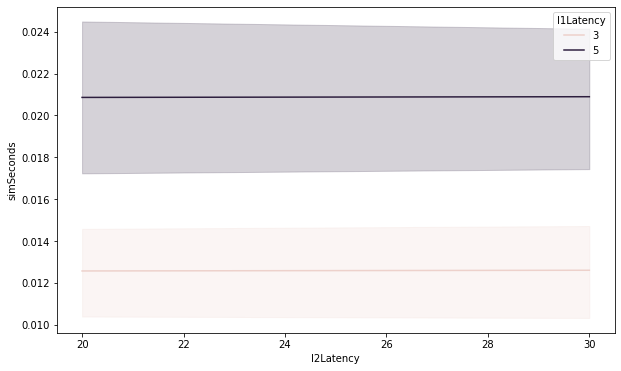

In [7]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(x='l2Latency', y='simSeconds', hue='l1Latency',data=data[(data.l1Size=="64kB")])
plt.savefig("report/figures/l2Latency-VS-simSeconds_64KB_lineplot.jpg", dpi=250)

C:\Users\Jeevan Aswani\AppData\Local\Temp\ipykernel_15136\3299676352.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax=sns.scatterplot(x='l2assoc', y='simSeconds', hue='l1Latency',style='l1assoc',size='l2Latency',data=data[(data.l1Size=="128kB")][(data.l1nl2ratio==4)])


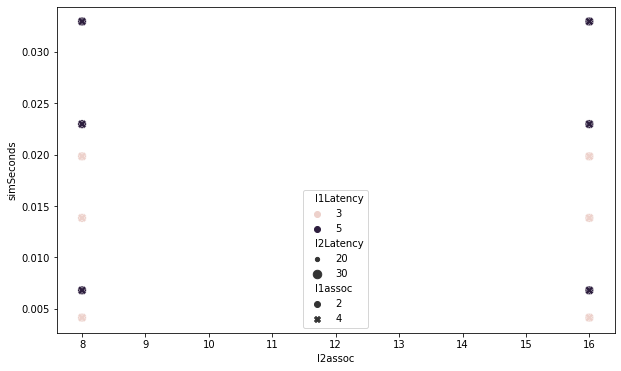

In [15]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x='l2assoc', y='simSeconds', hue='l1Latency',style='l1assoc',size='l2Latency',data=data[(data.l1Size=="128kB")][(data.l1nl2ratio==4)])
plt.savefig("report/figures/l2assoc-VS-simSeconds_128KB_scatterplot.jpg", dpi=250)

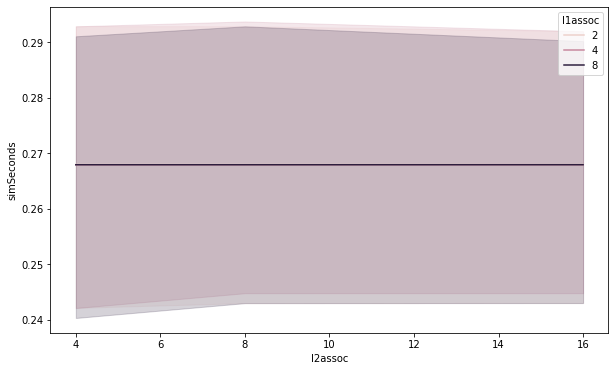

In [93]:
plt.figure(figsize=(10,6))
ax=sns.lineplot(x='l2assoc', y='simSeconds', hue='l1assoc',data=data[(data.l1Size=="64kB")])
plt.savefig("report/figures/l2assoc-VS-simSeconds_64KB_lineplot.jpg", dpi=250)

In [13]:
data[(data.l1Size=="128kB")][(data.l1nl2ratio==4)]

C:\Users\Jeevan Aswani\AppData\Local\Temp\ipykernel_15136\4067010229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.l1Size=="128kB")][(data.l1nl2ratio==4)]


,l1Size,l1nl2ratio,l1assoc,l2assoc,l1Latency,l2Latency,blkSize,simSeconds,hostInstRate,numCycles,cpu.cpi,cpu.ipc,dcache.overallMissRate::total,dcache.overallAvgMissLatency::total,icache.overallMissRate::total,icache.overallAvgMissLatency::total,l2cache.overallMissRate::total,l2cache.overallAvgMissLatency::total
48,128kB,4,2,16,3,20,0,0.004118,936388.0,2470079.0,5.543079,0.180405,0.002395,145934.484091,0.000949,141973.791379,0.979432,134041.803000
49,128kB,4,2,16,3,20,4,0.013807,1003140.0,8282363.0,5.428801,0.184203,0.000754,146237.575000,0.000271,142198.245283,0.980469,134195.160359
50,128kB,4,2,16,3,20,8,0.019790,1030571.0,11871526.0,5.357013,0.186671,0.000533,145495.002273,0.000188,142318.337907,0.980469,133939.465139
51,128kB,4,2,16,3,30,0,0.004152,919277.0,2490863.0,5.589720,0.178900,0.002395,180717.954545,0.000949,175322.413793,0.979432,168372.001000
52,128kB,4,2,16,3,30,4,0.013841,1003012.0,8302873.0,5.442244,0.183748,0.000754,179835.202273,0.000271,175486.777015,0.980469,167950.250000
53,128kB,4,2,16,3,30,8,0.019824,1030869.0,11892249.0,5.366364,0.186346,0.000533,180263.318182,0.000188,175332.372213,0.980469,168048.211155
54,128kB,4,2,16,5,20,0,0.006772,920301.0,4062122.0,9.115766,0.109700,0.002395,152659.313636,0.000949,148170.432759,0.979432,133793.420000
55,128kB,4,2,16,5,20,4,0.022920,1007522.0,13749189.0,9.012115,0.110962,0.000754,153723.920455,0.000271,148368.718696,0.980469,134264.895418
56,128kB,4,2,16,5,20,8,0.032892,1012937.0,19731124.0,8.903648,0.112314,0.000533,152901.786364,0.000188,148245.766724,0.980469,133833.202191
57,128kB,4,2,16,5,30,0,0.006806,888683.0,4082575.0,9.161664,0.109150,0.002395,185900.809091,0.000949,181737.489655,0.979432,167571.841000
